# Pull data and github repo

The code is heavily referenced from https://www.learnpytorch.io/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

DRIVE_PROJECT_PATH = "/content/drive/MyDrive/animal-classification"
MODEL_FOLDER = "models"
LOG_FOLDER = "logs"
NOTEBOOK_FILE = "animal-classification.ipynb"
GITHUB_PROJECT_PATH = "/content/animals-10"
DATA_PATH = "/content/dataset/animals10/raw-img"

Mounted at /content/drive


In [3]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'animals10:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F59760%2F840806%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240610%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240610T085923Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D34e10e329f6e324da4862dbc734e0c9f86c15f5f8eb8ae7d179c3ed2c80b38eb9b2a0a9d2efb540c9dd31d0c1bc9c4e0855008ac59434e076320bd25bd861a7c3f1fd31b093b9eac0e4468c90b307a890794dff2caf3972735c50cc80a593ca5937671e3ddafad84eaf167c38a393466b624c231aac7a5d32a911a5967819176353f5e13e94a8e2e2c280a28db9f21bc2ad1ac58c9c8ba1a7c0fe0780cdc96f0d62562b6010ded146c3e0c2182d493116091b0972895ab1a385b180c6c109d174d5c106826382dab1eda6de0188be46a151f21e94b5fa529158f434e446c3d7f42b0ba9ad79383ead9e87541e663236202703aa2cb9af05eb8835756d80ca3fa'

KAGGLE_INPUT_PATH='dataset'

!umount /kaggle/input/ 2> /dev/null
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')



[==================================================] 614087302 bytes downloaded
Downloaded and uncompressed: animals10
Data source import complete.


Pull from github and switch branch

In [4]:
!chmod +x config.sh
!./config.sh

Cloning into 'animals-10'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 73 (delta 25), reused 51 (delta 14), pack-reused 0
Receiving objects: 100% (73/73), 4.05 MiB | 8.94 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [5]:
%cd animals-10

/content/animals-10


In [6]:
!git branch inception
!git checkout inception

Switched to branch 'inception'


In [7]:
!git pull origin tuning

From https://github.com/Mnsd05/animals-10
 * branch            tuning     -> FETCH_HEAD
Updating ecada31..d4e7bdc
Fast-forward
 .gitignore            |   2 +
 animals10.ipynb       |   2 +-
 utils/data_loaders.py |  19 -----
 utils/eda.py          |  85 ---------------------
 utils/engine.py       | 283 ----------------------------------------------------------------------
 utils/tb_writers.py   |  38 ----------
 6 files changed, 3 insertions(+), 426 deletions(-)
 create mode 100644 .gitignore
 delete mode 100644 utils/data_loaders.py
 delete mode 100644 utils/eda.py
 delete mode 100644 utils/engine.py
 delete mode 100644 utils/tb_writers.py


Push changes to github

In [ ]:
!rm animals10.ipynb
!cp "/content/drive/MyDrive/animal-classification/animals10.ipynb" .

In [ ]:
!rm .gitignore
!touch .gitignore
!echo "__pycache__/" >> .gitignore
!echo "runs/" >> .gitignore

rm: cannot remove '.gitignore': No such file or directory


In [ ]:
!git add -A
!git commit -m 'Rearange main notebook'  # commit in Colab
!git push origin tuning

[tuning d4e7bdc] Rearange main notebook
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite animals10.ipynb (97%)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 194.25 KiB | 9.71 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/Mnsd05/animals-10.git
   5633d78..d4e7bdc  tuning -> tuning


 # 1.Setup

In [8]:
import torch
from torch import nn

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [10]:
# Set seeds
def set_seeds(seed: int=42):
    """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
    # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)

# 2. EDA

In [29]:
from eda import plot_num_instances, plot_image_sizes, show_random_images
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel"}

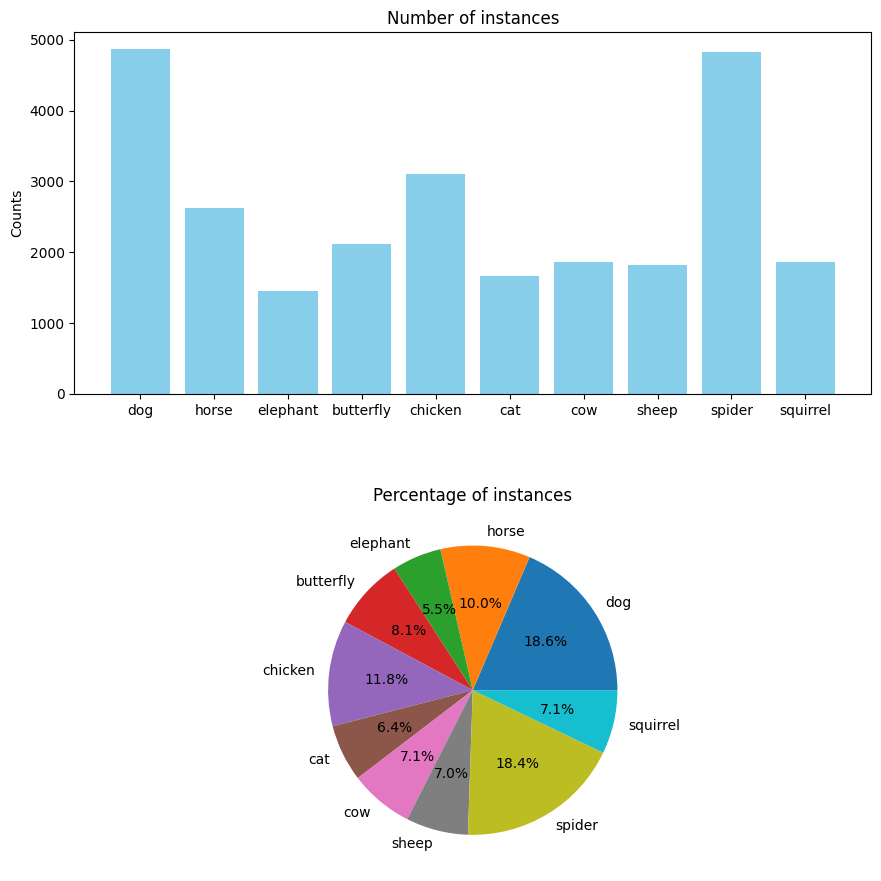

In [ ]:
plot_num_instances(translate, DATA_PATH)

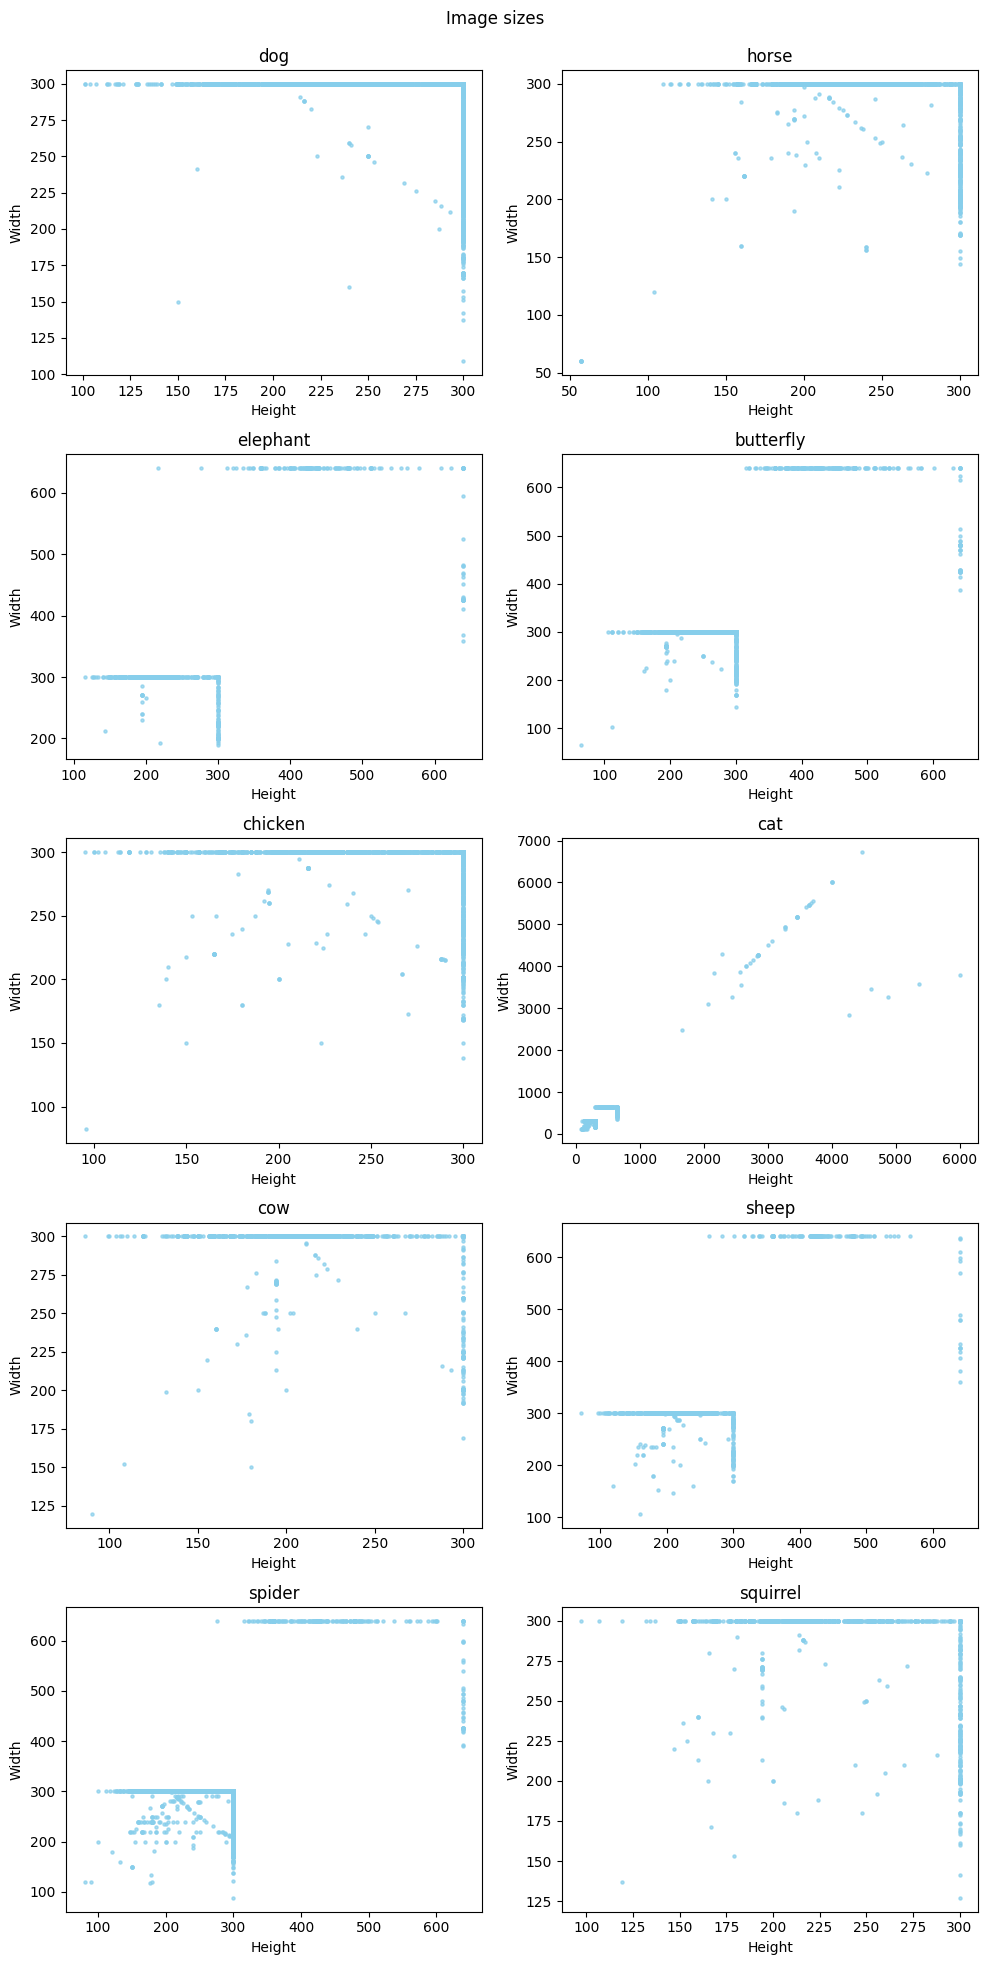

In [ ]:
plot_image_sizes(translate, DATA_PATH)

In [ ]:
show_random_images(translate, DATA_PATH)

Output hidden; open in https://colab.research.google.com to view.

# 3. Train and tune models

### Initial configuration:

###### 1) Model configuration

In [14]:
from models.alexnet import Alexnet
from models.mobilenet_v1 import MobileNetV1
from models.inception import InceptionNet

Create a model

In [ ]:
from torchsummary import summary
inception_net = InceptionNet(10).to(device)
summary(inception_net, (3, 224, 224))

Load a model(if any)

In [ ]:
inception_net.load_state_dict(torch.load(os.path.join(DRIVE_PROJECT_PATH, MODEL_FOLDER, "inception_net.pt"), map_location=torch.device('cpu')))

###### 2) Optimizer configuration

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(inception_net.parameters(), lr = 0.001)

###### 3) Choose optimal batchsize

In [21]:
from torchvision import transforms
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = ImageFolder(DATA_PATH, transform = transform)

Run below to find optimal batchsize(at the start of the project)

In [26]:
from utils import create_writer
from engine import train, save_model, batchsize_tuning
import os

In [ ]:
set_seeds()
batchsize_tune_writer = create_writer("Batchsize_tune", "mobilenet_v1", os.path.join(DRIVE_PROJECT_PATH, LOG_FOLDER))
batchsize_tune_mobilenet_v1 = MobileNetV1(10).to(device)
batchsize_tune_optimizer = torch.optim.Adam(batchsize_tune_mobilenet_v1.parameters(), lr = 0.001)
dataloader_dict = batchsize_tuning(batchsize_tune_mobilenet_v1, loss_fn, batchsize_tune_optimizer, dataset, device, batchsize_tune_writer)

[INFO] Created SummaryWriter, saving to: /content/drive/MyDrive/animal-classification/logs/Batchsize_tune/mobilenet_v1...


Epoch 0:   0%|          | 0/491 [00:00<?, ?batch/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch 0:   1%|          | 3/491 [00:04<12:00,  1.48s/batch, Loss=2.1864, Accuracy=0.2083]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch 0:   1%|          | 3/491 [00:06<16:45,  2.06s/batch, Loss=2.1864, Accuracy=0.2083]


KeyboardInterrupt: 

If we already know optimal batchsize

In [22]:
from utils import create_data_loaders
num_workers = 2
batch_size = 128
dataloader_dict = create_data_loaders(dataset, ["train", "val", "test"], [0.001, 0.001, 0.998], batch_size, num_workers)

In [23]:
train_dataloader = dataloader_dict["train"]
val_dataloader = dataloader_dict["val"]
test_dataloader = dataloader_dict["test"]

### Training

In [27]:
writer1 = create_writer("Initial_config", "inception_net", os.path.join(DRIVE_PROJECT_PATH, LOG_FOLDER))

[INFO] Created SummaryWriter, saving to: /content/drive/MyDrive/animal-classification/logs/Initial_config/inception_net...


In [30]:
history = train(inception_net, train_dataloader, val_dataloader, optimizer, loss_fn, 2, device, list(translate.values()), writer1)

Epoch 1:   0%|          | 0/1 [00:00<?, ?batch/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch 1: 100%|██████████| 1/1 [00:12<00:00, 12.90s/batch, Loss=2.3195, Accuracy=0.0370]


Epoch 1: test_loss: 2.2955 | test_acc: 0.0769


Epoch 2:   0%|          | 0/1 [00:00<?, ?batch/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch 2: 100%|██████████| 1/1 [00:08<00:00,  8.84s/batch, Loss=1.6338, Accuracy=0.4815]


Epoch 2: test_loss: 2.2858 | test_acc: 0.0769


In [ ]:
save_model(inception_net, os.path.join(DRIVE_PROJECT_PATH, MODEL_FOLDER), "inception_net.pt")

### View tensorboard

In [ ]:
# Viewing TensorBoard in Jupyter and Google Colab Notebooks (uncomment to view full TensorBoard instance)
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/animal-classification/logs

# Evaluation